<a href="https://colab.research.google.com/github/SriLasya04/Excelr-NLP/blob/main/Sentiment_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('/content/Reviews.csv', nrows=500)
df.head(3)

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Id                      500 non-null    int64 
 1   ProductId               500 non-null    object
 2   UserId                  500 non-null    object
 3   ProfileName             500 non-null    object
 4   HelpfulnessNumerator    500 non-null    int64 
 5   HelpfulnessDenominator  500 non-null    int64 
 6   Score                   500 non-null    int64 
 7   Time                    500 non-null    int64 
 8   Summary                 500 non-null    object
 9   Text                    500 non-null    object
dtypes: int64(5), object(5)
memory usage: 39.2+ KB


In [9]:
df.Summary.head()

,Summary
0,Good Quality Dog Food
1,Not as Advertised
2,"""Delight"" says it all"
3,Cough Medicine
4,Great taffy


In [10]:
df.Text.head()

,Text
0,I have bought several of the Vitality canned d...
1,Product arrived labeled as Jumbo Salted Peanut...
2,This is a confection that has been around a fe...
3,If you are looking for the secret ingredient i...
4,Great taffy at a great price. There was a wid...


In [11]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [12]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [13]:
from nltk.corpus import stopwords
from textblob import TextBlob
from textblob import Word

df['Text'] = df['Text'].apply(lambda x:" ".join(x.lower() for x in x.split()))
df['Text'] = df['Text'].str.replace('[^\w\s]',' ')
stop = stopwords.words('english')
df['Text'] = df['Text'].apply(lambda x:" ".join(x for x in x.split() if x not in stop))
df['Text'] = df['Text'].apply(lambda x: str(TextBlob(x).correct()))
df['Text'] = df['Text'].apply(lambda x:" ".join([Word(word).lemmatize() for word in x.split()]))
df.Text.head()

,Text
0,bought several vitality canned dog food produc...
1,product arrived labelled lumbo halted peanuts....
2,"connection around centuries. light, pillow cit..."
3,looking secret ingredient robitussin believe f...
4,great staff great price. wide assortment mummy...


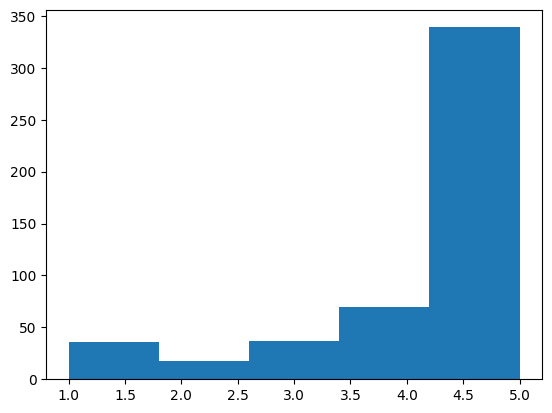

Score
1     36
2     18
3     37
4     70
5    339
Name: Id, dtype: int64


In [14]:
reviews = df
reviews.dropna(inplace=True)
reviews.Score.hist(bins=5,grid=False)
plt.show()
print(reviews.groupby('Score').count().Id)

In [15]:
score_1 = reviews[reviews['Score'] == 1].sample(n=18)
score_2 = reviews[reviews['Score'] == 2].sample(n=18)
score_3 = reviews[reviews['Score'] == 3].sample(n=18)
score_4 = reviews[reviews['Score'] == 4].sample(n=18)
score_5 = reviews[reviews['Score'] == 5].sample(n=18)

In [16]:
reviews_sample = pd.concat([score_1,score_2,score_3,score_4,score_5],axis=0)
reviews_sample.reset_index(drop=True,inplace=True)
print(reviews_sample.groupby('Score').count().Id)

Score
1    18
2    18
3    18
4    18
5    18
Name: Id, dtype: int64


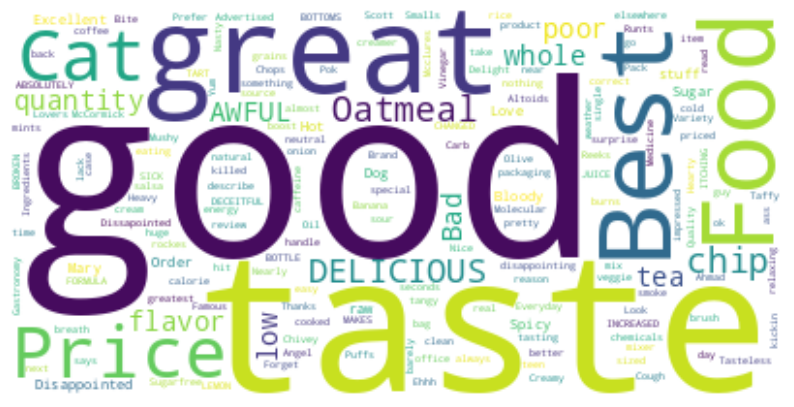

In [17]:
from wordcloud import WordCloud
review_str = " ".join(reviews_sample["Summary"].to_numpy())

wordcloud = WordCloud(background_color='white').generate(review_str)
plt.figure(figsize=(10,10))
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis("off")
plt.show()

In [25]:
negative_reviews = reviews_sample[reviews_sample['Score'].isin([1,2])]
positive_reviews = reviews_sample[reviews_sample['Score'].isin([4,5])]

negative_reviews_str = negative_reviews.Summary.str.cat()
positive_reviews_str = positive_reviews.Summary.str.cat()

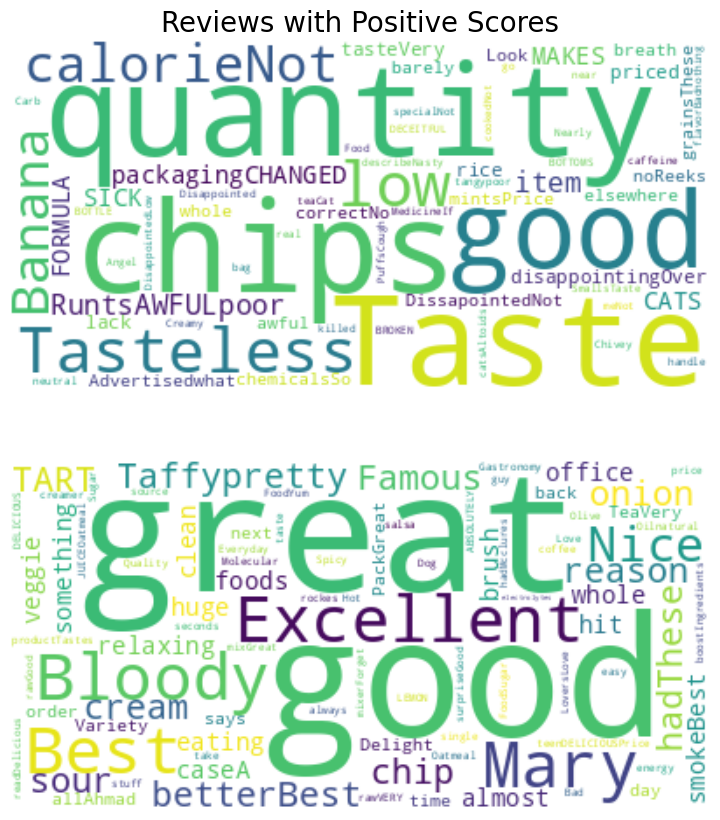

In [26]:
wordcloud_negative = WordCloud(background_color='white').generate(negative_reviews_str)
wordcloud_positive = WordCloud(background_color='white').generate(positive_reviews_str)

fig = plt.figure(figsize=(10,10))
ax1 = fig.add_subplot(211)
ax1.imshow(wordcloud_negative,interpolation='bilinear')
ax1.axis("off")
ax1.set_title("Reviews with Negative Scores",fontsize=20)
ax2 = fig.add_subplot(212)
ax2.imshow(wordcloud_positive,interpolation='bilinear')
ax2.axis("off")
ax1.set_title("Reviews with Positive Scores",fontsize=20)
plt.show()

In [27]:
!pip install vaderSentiment

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 2.6 MB/s eta 0:00:00


In [28]:
import seaborn as sns
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
plt.style.use('fivethirtyeight')
cp = sns.color_palette()
analyzer = SentimentIntensityAnalyzer()

emptyline=[]
for row in df['Text']:
    vs=analyzer.polarity_scores(row)
    emptyline.append(vs)

In [29]:
df_sentiments=pd.DataFrame(emptyline)
df_sentiments.head()

,neg,neu,pos,compound
0,0.000,0.517,0.483,0.9413
1,0.258,0.644,0.099,-0.5719
2,0.126,0.623,0.250,0.7880
3,0.000,0.868,0.132,0.4404
4,0.000,0.455,0.545,0.9186
